# Gold Historical Returns Visualisations

In [0]:
import yfinance as yf
import matplotlib.pyplot as plt
quant_pastel = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(quant_pastel)
%config InlineBackend.figure_format ='retina'

In [1]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

In [2]:
# data_daily = yf.download('^SPX')
# data_weekly = yf.download('^SPX', interval='1wk')
# data_monthly = yf.download('^SPX', interval='1mo')

data = yf.download('CC=F GC=F')
data.head()

/Users/dialidsantiago/Git/Quant-Girl-Blog/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/dialidsantiago/Git/Quant-Girl-Blog/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


Price      Adj Close       Close        High         Low        Open       \
Ticker          CC=F GC=F   CC=F GC=F   CC=F GC=F   CC=F GC=F   CC=F GC=F   
Date                                                                        
2000-01-03     830.0  NaN  830.0  NaN  846.0  NaN  820.0  NaN  840.0  NaN   
2000-01-04     836.0  NaN  836.0  NaN  841.0  NaN  823.0  NaN  830.0  NaN   
2000-01-05     831.0  NaN  831.0  NaN  850.0  NaN  828.0  NaN  840.0  NaN   
2000-01-06     841.0  NaN  841.0  NaN  847.0  NaN  824.0  NaN  830.0  NaN   
2000-01-07     853.0  NaN  853.0  NaN  855.0  NaN  836.0  NaN  848.0  NaN   

Price       Volume       
Ticker        CC=F GC=F  
Date                     
2000-01-03  2426.0  NaN  
2000-01-04  1957.0  NaN  
2000-01-05  3975.0  NaN  
2000-01-06  3454.0  NaN  
2000-01-07  5008.0  NaN

In [3]:
data.tail()

Price      Adj Close                 Close                  High               \
Ticker          CC=F         GC=F     CC=F         GC=F     CC=F         GC=F   
Date                                                                            
2024-03-25    9649.0  2174.800049   9649.0  2174.800049   9684.0  2179.399902   
2024-03-26    9622.0  2175.600098   9622.0  2175.600098  10080.0  2182.699951   
2024-03-27    9843.0  2190.600098   9843.0  2190.600098   9917.0  2196.199951   
2024-03-28    9766.0  2217.399902   9766.0  2217.399902  10014.0  2234.100098   
2024-04-01   10300.0  2257.899902  10300.0  2257.899902  10318.0  2286.399902   

Price          Low                 Open                Volume            
Ticker        CC=F         GC=F    CC=F         GC=F     CC=F      GC=F  
Date                                                                     
2024-03-25  8889.0  2166.199951  8921.0  2166.199951  19698.0      79.0  
2024-03-26  9574.0  2175.600098  9847.0  2182.699951  26263.0  202373.0  
2024-03-27  9267.0  2172.100098  9509.0  2179.399902  23291.0   31200.0  
2024-03-28  9671.0  2187.100098  9906.0  2193.600098  23291.0   31200.0  
2024-04-01  9632.0  2249.100098  9720.0  2259.199951  11068.0  199260.0

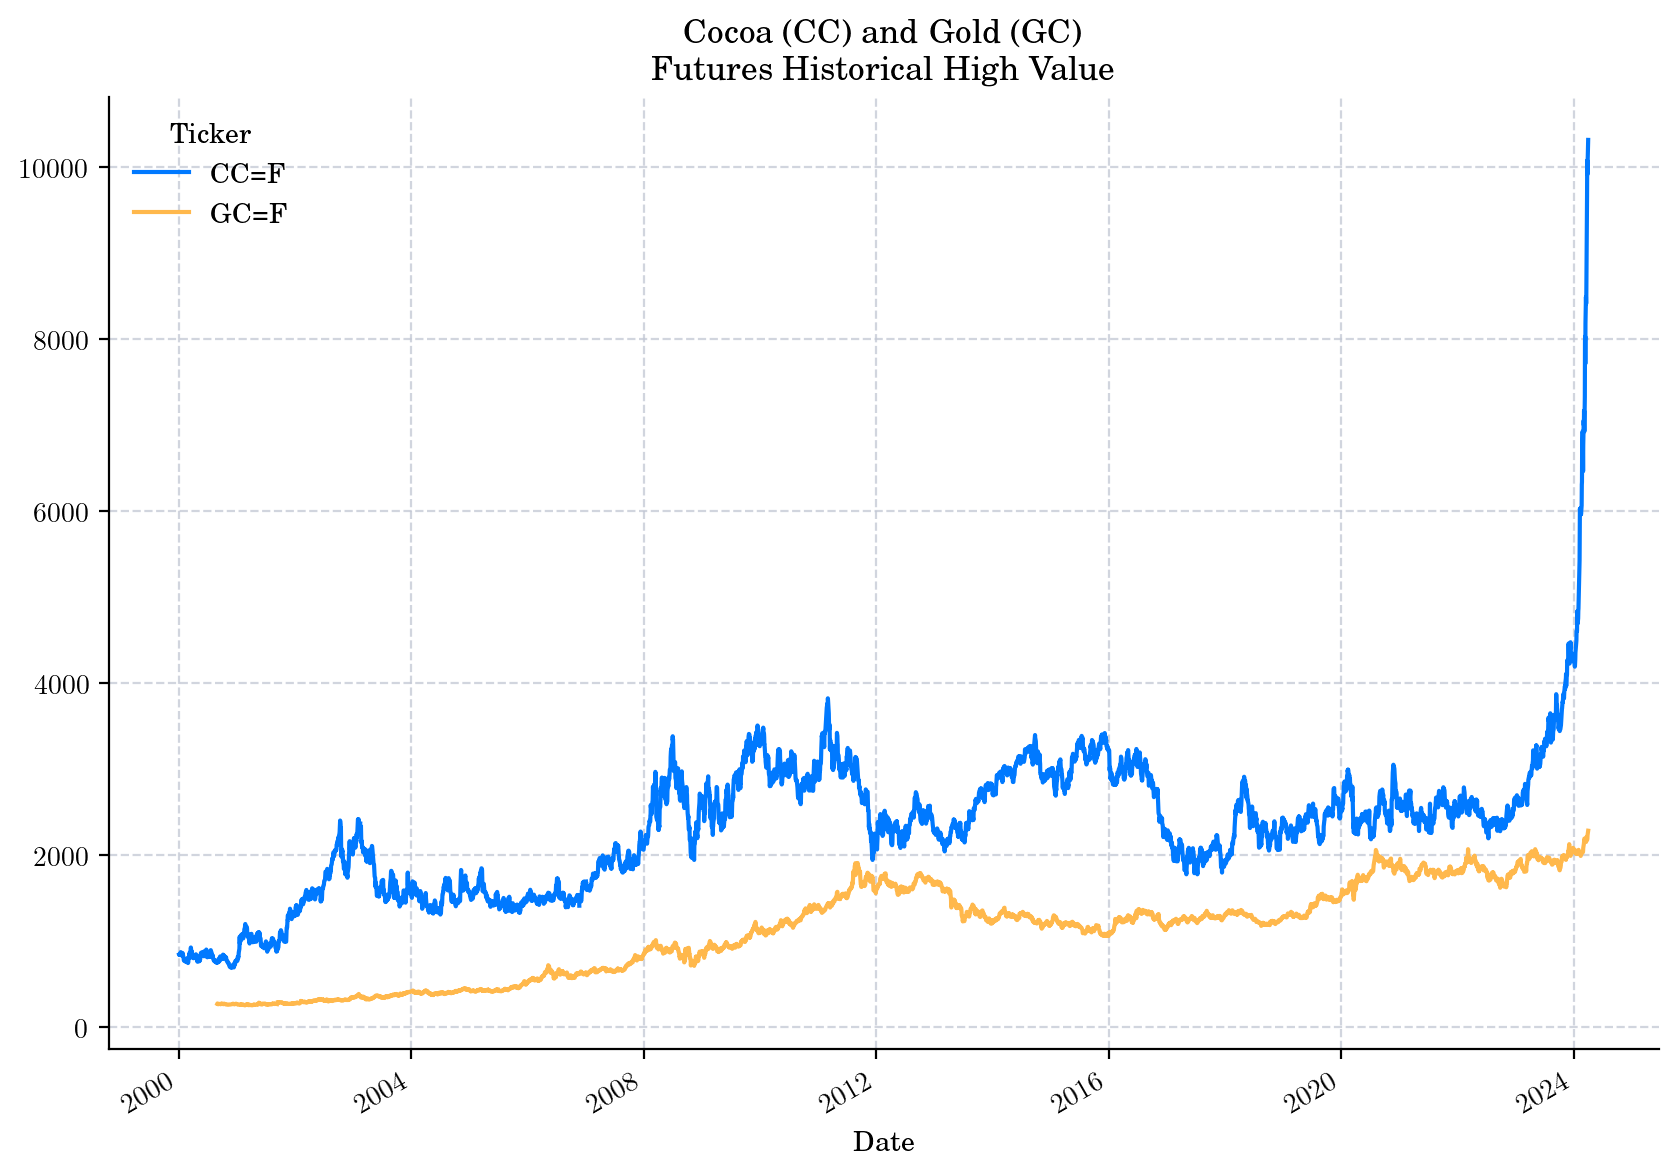

<Figure size 1200x600 with 0 Axes>

In [7]:
data['High'].plot(title="Cocoa (CC) and Gold (GC)\n Futures Historical High Value")
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime
df = yf.download('CC=F GC=F', interval='1d', start="2024-1-1", end=None)

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df[('Open', 'CC=F')],
                high=df[('High', 'CC=F')],
                low=df[('Low', 'CC=F')],
                close=df[('Close', 'CC=F')])])

fig.show()

In [ ]:
import numpy as np
kind = 'standard'

df = data

if kind == 'standard':
    column = 'Returns'
    df.loc[:, column] = 100*(df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close']

elif kind == 'log':

    column = 'Log-Returns'
    df.loc[:, column] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

df = df.reset_index()
df['year'] = df['Date'].dt.year
df['Decade'] = [int(np.floor(year/10) * 10) for year in np.array(df["year"])]
df = df.dropna()
df.head()

In [ ]:
df.tail()

In [ ]:
fig = df.plot(x='Date', y ='Returns', figsize=(12, 6), title='Cocoa Daily Returns')
plt.show()

In [ ]:
fig = df.hist(column='Returns', figsize=(12, 6))
plt.title('Cocoa Historical Daily Returns')
plt.show()

In [ ]:
import plotly.express as px
fig = px.line(df, x='Date', y='Returns',title='Cocoa Daily Returns')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(template="plotly_white")
fig.show()

In [ ]:
dta.head()

In [ ]:
# import plotly.express as px 
dta =df
fig = px.box(data_frame=dta,  x='Decade', y='Returns', labels={'Returns':"Returns (%)"},
             color='Decade',
            hover_data={'Date': True, 'Returns': ':.2f', 'High': ':.2f', 'Decade':False},
                notched=True, color_discrete_sequence=px.colors.qualitative.Bold
            )
fig.update_layout(
    title='Cocoa Historical Daily Returns',
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        # gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    # paper_bgcolor='rgb(243, 243, 243)',
    # plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_layout(template="plotly_white")
                  
fig.show()

In [ ]:
# import plotly.express as px 
dta =df
fig = px.box(data_frame=dta,  x='year', y='Returns', labels={'Returns':"Returns (%)"},
             color='year',
            hover_data={'Date': True, 'Returns': ':.2f', 'High': ':.2f', 'Decade':False},
                notched=True, color_discrete_sequence=px.colors.qualitative.Bold
            )
fig.update_layout(
    title='Cocoa Historical Daily Returns',
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        # gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    # paper_bgcolor='rgb(243, 243, 243)',
    # plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_layout(template="plotly_white")
                  
fig.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8),dpi=100)
box = df.boxplot(by='Decade', column='Returns', ax=ax, notch=True)
ax.set_title('Cocoa Historical Daily Returns')
ax.set_xlabel('Decade')
ax.set_ylabel('Returns (\%)')
plt.suptitle('') 
plt.show()

In [ ]:
# import plotly.express as px 
palette = px.colors.qualitative.Bold
colors = [(a/255, b/255, c/255) for (a,b,c) in [eval(p[4:-1]) for p in palette]]
colors_transparent1 = [(a/255, b/255, c/255, 0.7) for (a,b,c) in [eval(p[4:-1]) for p in palette]]
colors_transparent2 = [(a/255, b/255, c/255, 0.15) for (a,b,c) in [eval(p[4:-1]) for p in palette]]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6),dpi=150)


box = df.boxplot(by='year', column='Returns', ax=ax, return_type='dict', patch_artist=True, notch=True,
                #  whis=(5,95)
                 )

for patch, flier, median, color in zip(box['Returns']['boxes'],  
                                                         box['Returns']['fliers'], 
                                                         box['Returns']['medians'], 
                                                         colors_transparent1*3):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

box = df.boxplot(by='year', column='Returns', ax=ax,
                 return_type='dict', patch_artist=True, notch=True,  
                 boxprops={'fill': None},
                #  whis=(5,95)
                 )

for patch, flier, median,  color, colort2 in zip(box['Returns']['boxes'],  
                                                         box['Returns']['fliers'], 
                                                         box['Returns']['medians'], 
                                                         colors*3, colors_transparent2*3):
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    median.set_color(color)
    median.set_linewidth(1.5)
    flier.set_markerfacecolor(colort2)
    flier.set_markeredgecolor(color)
    
w = box['Returns']['whiskers']
for (a, b), c in zip(zip(w[0::2], w[1::2]),colors*3):
    a.set_color(c)
    b.set_color(c)
    a.set_linewidth(1.25)
    b.set_linewidth(1.25)
    
caps= box['Returns']['caps']
for (a, b), c in zip(zip(caps[0::2], caps[1::2]),colors*3):
    a.set_color(c)
    b.set_color(c)
    a.set_linewidth(1.5)
    b.set_linewidth(1.5)

# ax.set_axisbelow(True)
# ax.yaxis.grid(color='gray', linestyle='dashed')
ax.grid(visible=False, axis='x')

ax.set_title('Cocoa Futures Historical Daily Returns')
ax.set_xlabel('Decade')
ax.set_ylabel('Returns (\%)')
plt.suptitle('') 

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6),dpi=150)


box = df.boxplot(by='Decade', column='Returns', ax=ax, return_type='dict', patch_artist=True, notch=True,
                #  whis=(5,95)
                 )

for patch, flier, median, color in zip(box['Returns']['boxes'],  
                                                         box['Returns']['fliers'], 
                                                         box['Returns']['medians'], 
                                                         colors_transparent1*3):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

box = df.boxplot(by='Decade', column='Returns', ax=ax,
                 return_type='dict', patch_artist=True, notch=True,  
                 boxprops={'fill': None},
                #  whis=(5,95)
                 )

for patch, flier, median,  color, colort2 in zip(box['Returns']['boxes'],  
                                                         box['Returns']['fliers'], 
                                                         box['Returns']['medians'], 
                                                         colors*3, colors_transparent2*3):
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    median.set_color(color)
    median.set_linewidth(1.5)
    flier.set_markerfacecolor(colort2)
    flier.set_markeredgecolor(color)
    
w = box['Returns']['whiskers']
for (a, b), c in zip(zip(w[0::2], w[1::2]),colors*3):
    a.set_color(c)
    b.set_color(c)
    a.set_linewidth(1.25)
    b.set_linewidth(1.25)
    
caps= box['Returns']['caps']
for (a, b), c in zip(zip(caps[0::2], caps[1::2]),colors*3):
    a.set_color(c)
    b.set_color(c)
    a.set_linewidth(1.5)
    b.set_linewidth(1.5)

# ax.set_axisbelow(True)
# ax.yaxis.grid(color='gray', linestyle='dashed')
ax.grid(visible=False, axis='x')

ax.set_title('Cocoa Futures Historical Daily Returns')
ax.set_xlabel('Decade')
ax.set_ylabel('Returns (\%)')
plt.suptitle('') 

plt.show()